# Used Library



In [ ]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import zscore
from scipy import stats

#Importing the Dataset


In [ ]:
en = pd.read_excel('energy_dataset_simplified2.xlsx')
we = pd.read_excel('weather_features_simplified.xlsx')
we.rename(columns={"TIME": "time"}, inplace=True)

In [ ]:
en.head()

,time,total load actual,price actual
0,2015-01-01 00:00:00+01:00,25385.0,65.41
1,2015-01-01 01:00:00+01:00,24382.0,64.92
2,2015-01-01 02:00:00+01:00,22734.0,64.48
3,2015-01-01 03:00:00+01:00,21286.0,59.32
4,2015-01-01 04:00:00+01:00,20264.0,56.04


In [ ]:
we.head()

,time,city_name,temp (K),pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h
0,2015-01-01 00:00:00+01:00,Majapahit,270.475,1001,77,1,62,0.0,0.0
1,2015-01-01 01:00:00+01:00,Majapahit,270.475,1001,77,1,62,0.0,0.0
2,2015-01-01 02:00:00+01:00,Majapahit,269.686,1002,78,0,23,0.0,0.0
3,2015-01-01 03:00:00+01:00,Majapahit,269.686,1002,78,0,23,0.0,0.0
4,2015-01-01 04:00:00+01:00,Majapahit,269.686,1002,78,0,23,0.0,0.0


In [ ]:
print(len(we))
print(len(en))

178396
35064


Cut the data of the energy (2015 only)

In [ ]:
ener = en.iloc[:8761]
ener.head()

,time,total load actual,price actual
0,2015-01-01 00:00:00+01:00,25385.0,65.41
1,2015-01-01 01:00:00+01:00,24382.0,64.92
2,2015-01-01 02:00:00+01:00,22734.0,64.48
3,2015-01-01 03:00:00+01:00,21286.0,59.32
4,2015-01-01 04:00:00+01:00,20264.0,56.04


In [ ]:
print(len(we))
print(len(ener))

178396
8761


Drop Null Value

In [ ]:
ener = ener.dropna()
print(len(ener))

8734


**Checking the variance of city**

In [ ]:
we.city_name.unique()

array(['Majapahit', 'Kutai', 'Sriwijaya', ' Batavia', 'Pajajaran'],
      dtype=object)

**It shown that the weather data is larger than the energy because the weather data is consist of 5 city, only majapahit used for this experiment**

In [ ]:
citime = ener.iloc[0:, 0:1]
citime.head()

,time
0,2015-01-01 00:00:00+01:00
1,2015-01-01 01:00:00+01:00
2,2015-01-01 02:00:00+01:00
3,2015-01-01 03:00:00+01:00
4,2015-01-01 04:00:00+01:00


Creating the data frame that only store the time of the energy because we want to make the majapahit dataset by joining it base on the time (because the length is different)

In [ ]:
print(len(citime))

8734


**Creating Majapahit Dataset**




In [ ]:
majapahit = we[we["city_name"]=="Majapahit"]
majapahit.head()

,time,city_name,temp (K),pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h
0,2015-01-01 00:00:00+01:00,Majapahit,270.475,1001,77,1,62,0.0,0.0
1,2015-01-01 01:00:00+01:00,Majapahit,270.475,1001,77,1,62,0.0,0.0
2,2015-01-01 02:00:00+01:00,Majapahit,269.686,1002,78,0,23,0.0,0.0
3,2015-01-01 03:00:00+01:00,Majapahit,269.686,1002,78,0,23,0.0,0.0
4,2015-01-01 04:00:00+01:00,Majapahit,269.686,1002,78,0,23,0.0,0.0


In [ ]:
print(len(majapahit))
print(len(citime))

35145
8734


Drop the duplicate

In [ ]:
majapahit = majapahit.drop_duplicates()
print(len(majapahit))

35064


In [ ]:
majapahitFix = pd.merge(citime , majapahit , on=['time'])
majapahitFix.head()

,time,city_name,temp (K),pressure,humidity,wind_speed,wind_deg,rain_1h,rain_3h
0,2015-01-01 00:00:00+01:00,Majapahit,270.475,1001,77,1,62,0.0,0.0
1,2015-01-01 01:00:00+01:00,Majapahit,270.475,1001,77,1,62,0.0,0.0
2,2015-01-01 02:00:00+01:00,Majapahit,269.686,1002,78,0,23,0.0,0.0
3,2015-01-01 03:00:00+01:00,Majapahit,269.686,1002,78,0,23,0.0,0.0
4,2015-01-01 04:00:00+01:00,Majapahit,269.686,1002,78,0,23,0.0,0.0


In [ ]:
print(len(majapahitFix))

8734


In [ ]:
majapahitFix = majapahitFix.dropna()

In [ ]:
print(len(majapahitFix))

8734


#R2 Score

In [ ]:
load = ener.loc[0:, ['total load actual'] ]
load.head()

,total load actual
0,25385.0
1,24382.0
2,22734.0
3,21286.0
4,20264.0


**1. Majapahit**

In [ ]:
majapahitTemp = majapahitFix.loc[0:, ['temp (K)'] ]
majapahitWind = majapahitFix.loc[0:, ['wind_speed'] ]

Correlation Coefficient between Temperature and total load actual

In [ ]:
r2_score(majapahitTemp, load)

-13887354.064046357

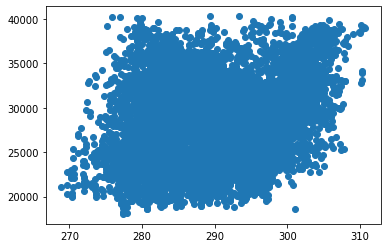

In [ ]:
plt.scatter(majapahitTemp, load)

Correlation Coefficient between Temperature and total load actual

In [ ]:
r2_score(majapahitWind, load)

-87630618.17620079

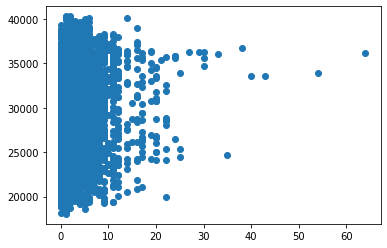

In [ ]:
plt.scatter(majapahitWind, load)

relation between 3

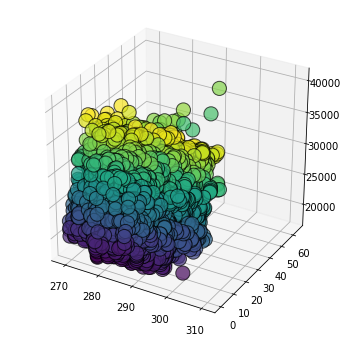

In [ ]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(majapahitTemp, majapahitWind, load,
           linewidths=1, alpha=.7,
           edgecolor='k',
           s = 200,
           c=load)
plt.show()

In [ ]:
frames = [majapahitTemp, majapahitWind]
result = pd.concat(frames, axis=1, join="inner")
result.head()

,temp (K),wind_speed
0,270.475,1
1,270.475,1
2,269.686,0
3,269.686,0
4,269.686,0


In [ ]:
z_scores = stats.zscore(result)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
maja = result[filtered_entries]

#Least Square Method


**Temperature and Load**

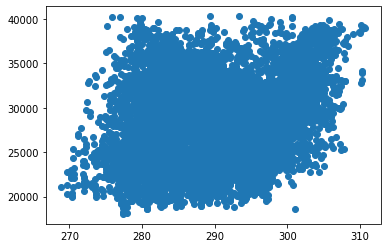

In [ ]:
plt.scatter(majapahitTemp, load)

In [ ]:
xT = majapahitTemp['temp (K)'].tolist()
yT = load['total load actual'].tolist()
XT_mean = np.mean(xT)
YT_mean = np.mean(yT)

In [ ]:
numT = 0
denT = 0
for i in range(0, len(xT)):
    numT += (xT[i] - XT_mean)*(yT[i] - YT_mean)
    denT += (xT[i] - XT_mean)**2

mT = numT / denT
cT = YT_mean - mT*XT_mean

print (mT, cT)

156.57962888177258 -17058.60414907688


In [ ]:
YT_pred = []

for i in range(0, len(xT)):
  YT_pred.append(mT*xT[i]+cT)

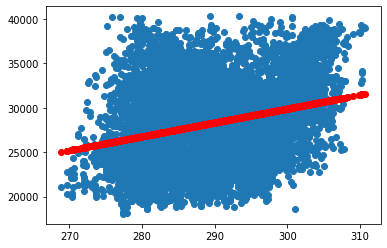

In [ ]:
plt.scatter(xT, yT) # actual
plt.scatter(xT, YT_pred, color='red')
plt.plot([min(xT), max(xT)], [min(YT_pred), max(YT_pred)], color='red') # predicted
plt.show()

Mean Square Error

In [ ]:
mean_squared_error(load, YT_pred)

20161531.681606982

R-Squared

In [ ]:
r2_score(load, YT_pred)

0.0661831696072821

**Wind Speed and Load**

In [ ]:
xW = majapahitWind['wind_speed'].tolist()
yW = load['total load actual'].tolist()
XW_mean = np.mean(xW)
YW_mean = np.mean(yW)

In [ ]:
numW = 0
denW = 0
for i in range(0, len(xW)):
    numW += (xW[i] - XW_mean)*(yW[i] - YW_mean)
    denW += (xW[i] - XW_mean)**2

mW = numW / denW
cW = YW_mean - mW*XW_mean

print (mW, cW)

278.93967462029644 27616.61526162026


In [ ]:
YW_pred = []

for i in range(0, len(xW)):
  YW_pred.append(mW*xW[i]+cW)

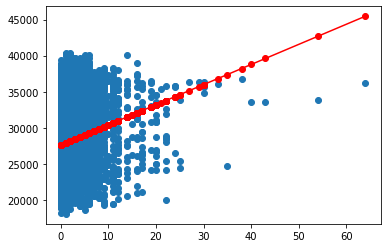

In [ ]:
plt.scatter(xW, yW) # actual
plt.scatter(xW, YW_pred, color='red')
plt.plot([min(xW), max(xW)], [min(YW_pred), max(YW_pred)], color='red') # predicted
plt.show()

Mean Square Error

In [ ]:
mean_squared_error(load, YW_pred)

20857387.449996226

In [ ]:
r2_score(load, YW_pred)

0.033953384772009154